Preparation of contact pattern matrix and $$\beta_{home}$$

# Transforming The Above Files:
### One should choose the division set for the model via the variable <b>'cell_name'</b> in the <i>indices.py</i> file in the model. The options are :
* 20
* 250
* 870

### In order to run this notebook One should make sure the above files exist:
* Data/division_choice
    * Data/division_choice/'cell_name'/cell2name.xlsx
    * Data/division_choice/'cell_name'/mat_macro_model_df.pickle
    * Data/division_choice/'cell_name'/taz2cell.xlsx
* Data/raw
    * Data/raw/pop2taz.xlsx
    * Data/raw/religion2taz.csv

    * Data/raw/leisure_mtx.csv
    * Data/raw/work_mtx.csv
    * Data/raw/school_mtx.csv

    * Data/raw/secularism_base_home.xlsx
    * Data/raw/haredi_base_home.xlsx
    * Data/raw/arabs_base_home.xlsx

    * Data/raw/taz_home_stay_by_periods.pickle
    
    * Data/raw/Summary_Home_0_TAZ.txt


### This Notebook generates the above files:
* Data/parameters
    - Data/parameters/beta_home.pickle
    - Data/parameters/stay_home_idx.pickle
    - Data/parameters/routine_t.pickle

* Data/demograph
    - Data/demograph/age_dist_area.csv
    - Data/demograph/religion_dis.csv
    - Data/demograph/sick_prop.csv

* Data/base_contact_mtx
    - Data/base_contact_mtx/full_home_mtx.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_school.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_work.csv
    - Data/base_contact_mtx/full_leisure_mtx_routine.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_bb.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_100_meters.csv
    - Data/base_contact_mtx/full_work_mtx_no_school.csv
    - Data/base_contact_mtx/full_work_mtx_no_work.csv
    - Data/base_contact_mtx/full_work_mtx_routine.csv
    - Data/base_contact_mtx/full_work_mtx_no_bb.csv
    - Data/base_contact_mtx/full_work_mtx_no_100_meters.csv
* Data/stay home
    - Data/stay_home/no_school.csv              
    - Data/stay_home/no_work.csv                
    - Data/stay_home/routine.csv                
    - Data/stay_home/no_bb.csv
    - Data/stay_home/no_100_meters.csv

# Imports

In [5]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
import scipy
from scipy import optimize
from scipy.sparse import csr_matrix
import sys
import os
sys.path.append('../SEIR_full/')
sys.path.append('..')
from SEIR_full.indices import *
from SEIR_full.helper_func import *
%matplotlib inline

# Data Creation

## Consts

In [3]:
cell_name = '20'

## Creating demograph/age_dist_area.csv

In [4]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)

In [5]:
pop_dist.columns

Index(['אזור 2630', ' מודל מקור', 'תכולת אזורי תנועה במודל המקור',
       'כלול באזור תנועה (1250) ', 'סמל ישוב', 'שם היישוב/ ים',
       'אזור סטטיסטי ביישוב', 'פירוט האזור', 'שם ישוב, שכונה, מיתקן או רחובות',
       'שימוש קרקע עיקרי', 'ערכי שימושי קרקע', 'אוכלוסייה', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'גילאים', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'מקושר ל 1250', 'מקושר ל 250',
       'מקושר ל 33', 'נפה', 'מחוז', 'שטח (מ"ר)'],
      dtype='object')

In [6]:
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])

In [7]:
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])

In [8]:
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop
1,4.46203e-05,4.73732e-05,5.3682e-05,8.167e-05,4.66849e-05,3.5788e-05,1.50264e-05,1.58293e-05,2.14498e-05,2.13351e-05,2.54645e-05,2.25969e-05,1.51411e-05,5.27643e-06,2.40881e-06,5.39114e-06,1,0.000460
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.000000
5,1.23881e-05,1.05529e-05,7.57053e-06,6.19407e-06,4.5882e-06,6.19407e-06,7.91465e-06,1.05529e-05,9.97934e-06,8.60288e-06,6.19407e-06,7.34112e-06,8.71758e-06,1.04382e-05,9.29111e-06,8.14406e-06,5,0.000135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0.000239275,0.000199472,0.00016724,0.000167699,0.000135008,0.000105185,7.30671e-05,5.9876e-05,5.59761e-05,4.59967e-05,3.06262e-05,1.92704e-05,1.60587e-05,1.06676e-05,8.25876e-06,8.14406e-06,2626,0.001342
2627,0.000137187,0.00012262,0.000113443,0.000110576,8.78641e-05,6.80201e-05,4.64555e-05,4.46203e-05,3.93438e-05,3.48703e-05,1.88116e-05,1.3994e-05,9.1764e-06,5.16173e-06,5.27643e-06,7.68524e-06,2627,0.000865
2628,0.000279536,0.000242945,0.000225625,0.000214154,0.000178252,0.000135925,9.81875e-05,8.06376e-05,7.67377e-05,6.21701e-05,4.06056e-05,2.62675e-05,1.97293e-05,1.23881e-05,1.07823e-05,1.04382e-05,2628,0.001714
2629,0.000222184,0.000217825,0.000191787,0.000182381,0.000193163,0.000192819,0.00019821,0.000188919,0.00019236,0.000187199,0.000162422,0.000129731,0.000114705,8.87817e-05,6.49231e-05,6.53819e-05,2629,0.002593


In [9]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [10]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']

In [11]:
taz2cell

,id,new_id
0,1,51
1,2,51
2,3,51
3,4,51
4,5,51
...,...,...
2625,2626,62_arab
2626,2627,62_arab
2627,2628,62_arab
2628,2629,62


In [12]:
pop_cell = pop_dist.merge(taz2cell, left_on='id', right_on='id')
pop_cell['new_id'] = pop_cell['new_id'].astype(str)
pop_cell.sort_values(by='new_id')

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop,new_id
1314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1315,0.000000,11
1243,2.08763e-05,1.74352e-05,1.74352e-05,2.53498e-05,2.90204e-05,3.31498e-05,2.05322e-05,1.30764e-05,1.33058e-05,1.50264e-05,1.81234e-05,2.66116e-05,2.72998e-05,2.24822e-05,1.50264e-05,1.60587e-05,1244,0.000331,11
1242,2.58086e-05,2.39734e-05,2.21381e-05,1.69763e-05,2.01881e-05,2.03028e-05,1.9844e-05,1.51411e-05,1.3994e-05,1.2044e-05,1.06676e-05,1.3994e-05,1.64028e-05,1.80087e-05,1.29617e-05,1.66322e-05,1243,0.000279,11
1241,4.74879e-05,4.37026e-05,4.5882e-05,3.60174e-05,3.75085e-05,2.8791e-05,2.6841e-05,2.45469e-05,2.62675e-05,2.23675e-05,1.92704e-05,2.00734e-05,3.07409e-05,2.93645e-05,1.83528e-05,1.97293e-05,1242,0.000477,11
1240,1.84675e-05,1.70911e-05,1.82381e-05,1.7894e-05,1.85822e-05,1.26176e-05,1.26176e-05,1.15852e-05,1.37646e-05,1.14705e-05,1.29617e-05,1.34205e-05,1.25028e-05,1.29617e-05,1.27323e-05,2.27116e-05,1241,0.000240,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1464,0.000000,71
1462,1.3994e-05,1.75499e-05,1.58293e-05,1.3994e-05,1.07823e-05,7.22642e-06,8.71758e-06,9.97934e-06,1.21587e-05,1.2044e-05,8.02935e-06,7.34112e-06,5.04702e-06,3.55586e-06,2.40881e-06,2.63822e-06,1463,0.000151,71
1461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1462,0.000000,71
1493,7.55906e-05,8.10965e-05,8.2817e-05,4.45056e-05,4.32438e-05,3.65909e-05,3.07409e-05,3.03968e-05,3.41821e-05,3.37233e-05,2.23675e-05,1.64028e-05,1.31911e-05,8.94699e-06,6.07937e-06,6.7676e-06,1494,0.000567,71


In [13]:
def make_pop(df):
    df = df.iloc[:,0:-2]
    return df.sum(axis=0)

In [14]:
pop_cell = pop_cell.groupby(by='new_id').apply(lambda df: make_pop(df))

In [15]:
pop_cell

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id
new_id,,,,,,,,,,,,,,,,,
11,0.013979,0.012611,0.011329,0.010693,0.009852,0.008464,0.007345,0.006310,0.005635,0.004979,0.004416,0.004195,0.003745,0.003354,0.002551,0.004553,364303.0
11_betshemesh,0.002288,0.002029,0.001731,0.001184,0.000950,0.000916,0.000820,0.000697,0.000599,0.000479,0.000361,0.000306,0.000237,0.000179,0.000123,0.000199,68524.0
21,0.001418,0.001315,0.001202,0.001100,0.001050,0.001067,0.000855,0.000744,0.000769,0.000715,0.000668,0.000691,0.000631,0.000528,0.000371,0.000618,83641.0
22,0.001270,0.001194,0.001115,0.001144,0.001069,0.001038,0.000854,0.000809,0.000823,0.000736,0.000677,0.000676,0.000628,0.000524,0.000360,0.000572,72476.0
23,0.005327,0.005231,0.005097,0.005213,0.004589,0.004226,0.003492,0.003414,0.003626,0.003277,0.002937,0.002625,0.002311,0.001867,0.001348,0.002113,235975.0
24,0.006462,0.006577,0.006661,0.006841,0.005947,0.005540,0.004686,0.004583,0.004842,0.004356,0.003897,0.003416,0.002833,0.002259,0.001573,0.002483,354520.0
29,0.000527,0.000564,0.000541,0.000563,0.000447,0.000378,0.000363,0.000403,0.000406,0.000346,0.000270,0.000246,0.000217,0.000188,0.000106,0.000124,24039.0
31,0.005195,0.004713,0.004210,0.004030,0.004332,0.004617,0.004596,0.004339,0.004122,0.003784,0.003437,0.003609,0.003728,0.003881,0.002889,0.005401,405426.0
32,0.004746,0.004858,0.004587,0.004557,0.003737,0.003351,0.003167,0.003246,0.003365,0.002995,0.002553,0.002252,0.001947,0.001579,0.001142,0.001718,204793.0


In [16]:
A

{0: '0-4',
 1: '5-9',
 2: '10-19',
 3: '20-29',
 4: '30-39',
 5: '40-49',
 6: '50-59',
 7: '60-69',
 8: '70+'}

In [17]:
pop_cell['10-19'] = pop_cell['10-14'] + pop_cell['15-19']
pop_cell['20-29'] = pop_cell['20-24'] + pop_cell['25-29']
pop_cell['30-39'] = pop_cell['30-34'] + pop_cell['35-39']
pop_cell['40-49'] = pop_cell['40-44'] + pop_cell['45-49']
pop_cell['50-59'] = pop_cell['50-54'] + pop_cell['55-59']
pop_cell['60-69'] = pop_cell['60-64'] + pop_cell['65-69']
pop_cell['70+'] = pop_cell['70-74'] + pop_cell['75+']
pop_cell = pop_cell[list(A.values())]
pop_cell

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
new_id,,,,,,,,,
11,0.013979,0.012611,0.022022,0.018316,0.013655,0.010615,0.008611,0.007099,0.007104
11_betshemesh,0.002288,0.002029,0.002915,0.001865,0.001517,0.001078,0.000667,0.000415,0.000322
21,0.001418,0.001315,0.002302,0.002117,0.001599,0.001484,0.001358,0.001159,0.000989
22,0.001270,0.001194,0.002259,0.002107,0.001663,0.001558,0.001353,0.001152,0.000932
23,0.005327,0.005231,0.010311,0.008815,0.006906,0.006904,0.005563,0.004178,0.003461
24,0.006462,0.006577,0.013503,0.011486,0.009269,0.009198,0.007313,0.005092,0.004055
29,0.000527,0.000564,0.001104,0.000825,0.000766,0.000751,0.000517,0.000406,0.000230
31,0.005195,0.004713,0.008240,0.008949,0.008935,0.007906,0.007046,0.007609,0.008289
32,0.004746,0.004858,0.009143,0.007088,0.006413,0.006360,0.004805,0.003526,0.002860


In [18]:
pop_cell = pop_cell / pop_cell.sum().sum()

In [19]:
pop_cell.reset_index(inplace=True)
pop_cell.columns = ['cell_id'] + list(A.values())

In [20]:
pop_cell

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,11,0.013979,0.012611,0.022022,0.018316,0.013655,0.010615,0.008611,0.007099,0.007104
1,11_betshemesh,0.002288,0.002029,0.002915,0.001865,0.001517,0.001078,0.000667,0.000415,0.000322
2,21,0.001418,0.001315,0.002302,0.002117,0.001599,0.001484,0.001358,0.001159,0.000989
3,22,0.001270,0.001194,0.002259,0.002107,0.001663,0.001558,0.001353,0.001152,0.000932
4,23,0.005327,0.005231,0.010311,0.008815,0.006906,0.006904,0.005563,0.004178,0.003461
5,24,0.006462,0.006577,0.013503,0.011486,0.009269,0.009198,0.007313,0.005092,0.004055
6,29,0.000527,0.000564,0.001104,0.000825,0.000766,0.000751,0.000517,0.000406,0.000230
7,31,0.005195,0.004713,0.008240,0.008949,0.008935,0.007906,0.007046,0.007609,0.008289
8,32,0.004746,0.004858,0.009143,0.007088,0.006413,0.006360,0.004805,0.003526,0.002860
9,41,0.004818,0.004925,0.008916,0.006962,0.006616,0.007082,0.005361,0.004692,0.004559


In [21]:
pop_cell.to_csv('../Data/demograph/age_dist_area.csv')

## Creating demograph/religion_dis.csv

In [22]:
religion2taz = pd.read_csv('../Data/raw/religion2taz.csv')
religion2taz.sort_values(by='taz_id', inplace=True)
religion2taz.columns = ['id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian']
religion2taz['Jewish'] = religion2taz['Orthodox'] + religion2taz['Sacular']
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
0,1,0.029482,0.0,0.0,0.970310,0.000207,0.0,0.999793
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,5,0.010413,0.0,0.0,0.915182,0.074406,0.0,0.925594
...,...,...,...,...,...,...,...,...
2545,2626,0.000000,0.0,0.0,0.000303,0.999697,0.0,0.000303
2546,2627,0.000000,0.0,0.0,0.002635,0.997365,0.0,0.002635
2547,2628,0.000000,0.0,0.0,0.002553,0.997447,0.0,0.002553
2548,2629,0.001288,0.0,0.0,0.940031,0.058681,0.0,0.941319


In [23]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [24]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']
taz2cell

,id,new_id
0,1,51
1,2,51
2,3,51
3,4,51
4,5,51
...,...,...
2625,2626,62_arab
2626,2627,62_arab
2627,2628,62_arab
2628,2629,62


In [25]:
religion2taz = religion2taz.merge(taz2cell, on='id')
religion2taz['new_id'] = religion2taz['new_id'].astype(str)
religion2taz.sort_values(by='new_id', inplace=True)
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id
1314,1315,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,11
1243,1244,0.001580,0.0,0.0,0.983517,0.014903,0.0,0.985097,11
1242,1243,0.287032,0.0,0.0,0.712926,0.000042,0.0,0.999958,11
1241,1242,0.060900,0.0,0.0,0.939039,0.000062,0.0,0.999938,11
1240,1241,0.013311,0.0,0.0,0.986685,0.000004,0.0,0.999996,11
...,...,...,...,...,...,...,...,...,...
1463,1464,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,71
1462,1463,0.001582,0.0,0.0,0.998388,0.000030,0.0,0.999970,71
1461,1462,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,71
1493,1494,0.004560,0.0,0.0,0.995440,0.000000,0.0,1.000000,71


In [26]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135
...,...,...
2626,2626,0.001342
2627,2627,0.000865
2628,2628,0.001714
2629,2629,0.002593


In [27]:
religion2taz = religion2taz.merge(pop_dist, on='id')
religion2taz.sort_values(by='id', inplace=True)
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop
1667,1,0.029482,0.0,0.0,0.970310,0.000207,0.0,0.999793,51,0.000460
1764,2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,51,0.000000
1726,3,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,51,0.000000
1725,4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,51,0.000000
1724,5,0.010413,0.0,0.0,0.915182,0.074406,0.0,0.925594,51,0.000135
...,...,...,...,...,...,...,...,...,...,...
2355,2626,0.000000,0.0,0.0,0.000303,0.999697,0.0,0.000303,62_arab,0.001342
2354,2627,0.000000,0.0,0.0,0.002635,0.997365,0.0,0.002635,62_arab,0.000865
2353,2628,0.000000,0.0,0.0,0.002553,0.997447,0.0,0.002553,62_arab,0.001714
2336,2629,0.001288,0.0,0.0,0.940031,0.058681,0.0,0.941319,62,0.002593


In [28]:
religion2taz.sort_values(by='new_id').head(20)

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop
0,1315,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000,11,0.000000
1,1244,0.001580,0.0,0.0,0.983517,1.490255e-02,0.0,0.985097,11,0.000331
2,1243,0.287032,0.0,0.0,0.712926,4.247566e-05,0.0,0.999958,11,0.000279
3,1242,0.060900,0.0,0.0,0.939039,6.183342e-05,0.0,0.999938,11,0.000477
4,1241,0.013311,0.0,0.0,0.986685,3.871838e-06,0.0,0.999996,11,0.000240
5,1240,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000,11,0.000000
6,1239,0.000000,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000,11,0.000000
7,1245,0.187212,0.0,0.0,0.801423,1.136515e-02,0.0,0.988635,11,0.000097
8,1238,0.494585,0.0,0.0,0.505361,5.366122e-05,0.0,0.999946,11,0.000449
9,1236,0.293252,0.0,0.0,0.701952,4.795956e-03,0.0,0.995204,11,0.000718


In [29]:
def make_pop(df):
    df = df.iloc[:,1:8].multiply(df['tot_pop'], axis='index')
    return df.sum(axis=0)

In [30]:
religion2taz = religion2taz.groupby(by='new_id').apply(lambda df: make_pop(df))

In [31]:
religion2taz

,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
new_id,,,,,,,
11,3.240645e-02,0.000000e+00,0.000000e+00,0.079978,0.001628,3.382023e-08,0.112384
11_betshemesh,5.424044e-03,0.000000e+00,0.000000e+00,0.007646,0.000027,0.000000e+00,0.013071
21,8.801567e-04,0.000000e+00,0.000000e+00,0.012319,0.000243,3.003433e-04,0.013199
22,2.334938e-04,1.989854e-03,0.000000e+00,0.009583,0.000514,1.167624e-03,0.009816
23,2.983761e-04,0.000000e+00,3.529424e-06,0.030200,0.022590,3.603005e-03,0.030499
24,1.890820e-04,6.267668e-03,0.000000e+00,0.033877,0.029196,3.426154e-03,0.034066
29,2.919277e-06,1.468223e-03,0.000000e+00,0.004196,0.000023,0.000000e+00,0.004198
31,2.090851e-03,1.218765e-03,0.000000e+00,0.057505,0.003703,2.363745e-03,0.059596
32,3.817139e-04,8.262787e-08,0.000000e+00,0.030266,0.019152,1.894093e-08,0.030648


In [32]:
tmp = religion2taz[['Druze', 'Other', 'Muslim', 'Christian', 'Jewish']].sum(axis=1)
tmp.loc[tmp == 0] = 1
religion2taz = religion2taz.divide(tmp, axis=0)
religion2taz

,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
new_id,,,,,,,
11,0.284237,0.000000,0.000000e+00,0.701484,0.014279,2.966372e-07,0.985721
11_betshemesh,0.414140,0.000000,0.000000e+00,0.583828,0.002032,0.000000e+00,0.997968
21,0.064046,0.000000,0.000000e+00,0.896430,0.017668,2.185512e-02,0.960477
22,0.017311,0.147527,0.000000e+00,0.710475,0.038119,8.656731e-02,0.727786
23,0.005263,0.000000,6.225292e-05,0.532682,0.398442,6.355076e-02,0.537945
24,0.002592,0.085910,0.000000e+00,0.464350,0.400186,4.696187e-02,0.466942
29,0.000513,0.258054,0.000000e+00,0.737411,0.004022,0.000000e+00,0.737924
31,0.031262,0.018223,0.000000e+00,0.859805,0.055367,3.534245e-02,0.891067
32,0.007665,0.000002,0.000000e+00,0.607757,0.384575,3.803461e-07,0.615423


In [33]:
religion2taz.reset_index(inplace=True)

In [34]:
religion2taz.columns = ['cell_id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian', 'Jewish']
religion2taz

,cell_id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
0,11,0.284237,0.000000,0.000000e+00,0.701484,0.014279,2.966372e-07,0.985721
1,11_betshemesh,0.414140,0.000000,0.000000e+00,0.583828,0.002032,0.000000e+00,0.997968
2,21,0.064046,0.000000,0.000000e+00,0.896430,0.017668,2.185512e-02,0.960477
3,22,0.017311,0.147527,0.000000e+00,0.710475,0.038119,8.656731e-02,0.727786
4,23,0.005263,0.000000,6.225292e-05,0.532682,0.398442,6.355076e-02,0.537945
5,24,0.002592,0.085910,0.000000e+00,0.464350,0.400186,4.696187e-02,0.466942
6,29,0.000513,0.258054,0.000000e+00,0.737411,0.004022,0.000000e+00,0.737924
7,31,0.031262,0.018223,0.000000e+00,0.859805,0.055367,3.534245e-02,0.891067
8,32,0.007665,0.000002,0.000000e+00,0.607757,0.384575,3.803461e-07,0.615423
9,41,0.015193,0.000000,0.000000e+00,0.767459,0.217348,0.000000e+00,0.782652


In [35]:
religion2taz.to_csv('../Data/demograph/religion_dis.csv')

## Creating stay_home/ALL

In [36]:
home = pd.read_csv('../Data/raw/Summary_Home_0_TAZ.txt', delimiter='\t', encoding='utf-16')
home.columns = ['date', 'taz_id', 'stay', 'out']
home['date'] = pd.to_datetime(home['date'], dayfirst=True)
home['stay'] = home['stay'].apply(lambda x: x.replace(',','')).astype(int)
home['out'] = home['out'].apply(lambda x: x.replace(',','')).astype(int)
home['total'] = home['stay'] + home['out']
home['out_pct'] = home['out'] / home['total']
# home['city_parsed'] = home.city.apply(lambda x: x[:-7] if ('חרדים' in x or 'ערבים' in x) else x)
home.head()

,date,taz_id,stay,out,total,out_pct
0,2020-02-01,1,2249,1742,3991,0.436482
1,2020-02-01,5,1226,646,1872,0.345085
2,2020-02-01,6,789,365,1154,0.316291
3,2020-02-01,8,2780,1869,4649,0.402022
4,2020-02-01,9,4032,2788,6820,0.408798


In [37]:
home.describe()

,taz_id,stay,out,total,out_pct
count,137678.000000,137678.000000,137678.000000,137678.000000,137678.000000
mean,1286.067338,2698.334360,1894.839255,4593.173615,0.429082
std,783.451484,2710.537599,1865.464227,4128.529670,0.172477
min,1.000000,1.000000,1.000000,2.000000,0.000612
25%,601.000000,1034.000000,688.000000,2013.000000,0.299796
50%,1226.500000,1985.000000,1360.000000,3543.500000,0.442424
75%,2009.000000,3476.000000,2502.000000,5946.000000,0.565511
max,2630.000000,42522.000000,27568.000000,56052.000000,0.996865


In [38]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,51
1,2,51
2,3,51
3,4,51
4,5,51


In [39]:
home = home.merge(taz2cell, on='taz_id')
set(home['cell_id'])

{'11',
 '11_betshemesh',
 '21',
 '22',
 '23',
 '24',
 '29',
 '31',
 '32',
 '41',
 '42',
 '43',
 '44',
 '51',
 '51_bb',
 '51_tlv',
 '61',
 '62',
 '62_arab',
 '71'}

In [40]:
home

,date,taz_id,stay,out,total,out_pct,cell_id
0,2020-02-01,1,2249,1742,3991,0.436482,51
1,2020-02-02,1,1058,2932,3990,0.734837,51
2,2020-02-03,1,1144,2847,3991,0.713355,51
3,2020-02-04,1,1180,2810,3990,0.704261,51
4,2020-02-05,1,1112,2878,3990,0.721303,51
...,...,...,...,...,...,...,...
137673,2020-04-09,2630,6295,1230,7525,0.163455,62
137674,2020-04-10,2630,4825,2700,7525,0.358804,62
137675,2020-04-11,2630,5990,1535,7525,0.203987,62
137676,2020-04-12,2630,4130,3395,7525,0.451163,62


In [41]:
len(set(home['taz_id']))

1886

In [42]:
home_cell = home.groupby(['date', 'cell_id'])[['stay', 'out', 'total']].sum().reset_index()
home_cell['out_pct'] = home_cell['out'] / home_cell['total']
home_cell

,date,cell_id,stay,out,total,out_pct
0,2020-02-01,11,749513,372902,1122415,0.332232
1,2020-02-01,11_betshemesh,69702,17313,87015,0.198966
2,2020-02-01,21,65918,27127,93045,0.291547
3,2020-02-01,22,53752,36538,90290,0.404674
4,2020-02-01,23,253579,190755,444334,0.429305
...,...,...,...,...,...,...
1455,2020-04-13,51_tlv,562829,166239,729068,0.228016
1456,2020-04-13,61,355574,142348,497922,0.285884
1457,2020-04-13,62,324648,154847,479495,0.322938
1458,2020-04-13,62_arab,65862,54822,120684,0.454261


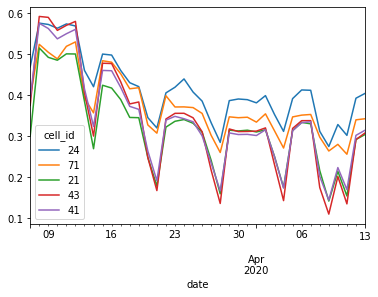

In [43]:
pivoted = pd.pivot_table(home_cell, index='date', columns='cell_id', values='out_pct')
pivoted[pivoted.index >= '2020-03-07'][np.random.choice(pivoted.columns, 5)].plot()

In [44]:
def robust_max(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[-n:])

def robust_min(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[:n])

global_max = pivoted.apply(robust_max)
global_min = pivoted.apply(robust_min)
# global_min, global_max = 0,1
span = global_max - global_min
relative_rate = pivoted.apply(lambda row: (row - global_min) / span, axis=1)

In [45]:
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return np.sqrt(variance)

def avg_by_dates(df, from_date, to_date, weights=None):
    filtered = df[(df.index >= from_date) & (df.index <= to_date)]
    if weights is None:
        return filtered.describe().T[['mean','std','min','max']]
    
    weights = pd.Series(weights)
    stats = filtered.describe().T[['min','max']]
    stats['mean'] = filtered.apply(lambda col: np.average(col, weights=weights))
    stats['std'] = filtered.apply(lambda col: weighted_std(col, weights=weights))
    return stats

In [46]:
result = dict()
result['routine'] = avg_by_dates(relative_rate, '2020-02-02', '2020-02-29')
result['no_school'] = avg_by_dates(relative_rate, '2020-03-14', '2020-03-16', 
                         weights={'2020-03-14': 2/7, '2020-03-15': 2.5/7, '2020-03-16': 2.5/7})
result['no_work'] = avg_by_dates(relative_rate, '2020-03-17', '2020-03-25', 
                       weights={i:1/14 if i.day in [17,18,24,25] else 1/7
                                  for i in pd.date_range('2020-03-17', '2020-03-25')})
result['no_100_meters'] = avg_by_dates(relative_rate, '2020-03-26', '2020-04-02', 
                              weights={i:1/14 if i.day in [26,2] else 1/7
                                       for i in pd.date_range('2020-03-26', '2020-04-02')})
result['no_bb'] = avg_by_dates(relative_rate, '2020-04-03', '2020-04-06', 
                         weights={i:5/14 if i.day in [5,6] else 1/7
                                  for i in pd.date_range('2020-04-03', '2020-04-06')})

In [47]:
# save
try:
    os.mkdir('../Data/stay_home')
except:
    pass
result['routine'].to_csv('../Data/stay_home/routine.csv')
result['no_school'].to_csv('../Data/stay_home/no_school.csv')
result['no_work'].to_csv('../Data/stay_home/no_work.csv')
result['no_100_meters'].to_csv('../Data/stay_home/no_100_meters.csv')
result['no_bb'].to_csv('../Data/stay_home/no_bb.csv')

## Creating demograph/sick_pop.csv

In [48]:
taz2sick = pd.read_csv('../Data/sick/taz2sick.csv')
taz2sick.head()

,taz_id,cases_prop
0,1,0.099284
1,2,0.099284
2,3,0.099284
3,4,0.099284
4,5,0.099284


In [49]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,51
1,2,51
2,3,51
3,4,51
4,5,51


In [50]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135


In [51]:
taz2sick = taz2sick.merge(taz2cell, on='taz_id')
taz2sick.head()

,taz_id,cases_prop,cell_id
0,1,0.099284,51
1,2,0.099284,51
2,3,0.099284,51
3,4,0.099284,51
4,5,0.099284,51


In [52]:
taz2sick = taz2sick.merge(pop_dist, left_on='taz_id', right_on='id')
taz2sick.head()

,taz_id,cases_prop,cell_id,id,tot_pop
0,1,0.099284,51,1,0.000460
1,2,0.099284,51,2,0.000000
2,3,0.099284,51,3,0.000000
3,4,0.099284,51,4,0.000000
4,5,0.099284,51,5,0.000135


In [53]:
taz2sick['cases_prop'] = taz2sick['cases_prop'] * taz2sick['tot_pop']

In [54]:
def wheighted_average(df):
    tot = df['tot_pop'].sum()
    return (df['cases_prop'].sum() / tot)

taz2sick = taz2sick.groupby(by='cell_id')[['cases_prop', 'tot_pop']].apply(wheighted_average)

In [55]:
taz2sick.name='cases_prop'

In [56]:
taz2sick

cell_id
11               0.137496
11_betshemesh    0.012624
21               0.010918
22               0.006482
23               0.037189
24               0.018083
29               0.003412
31               0.032753
32               0.013306
41               0.038895
42               0.107472
43               0.051518
44               0.063460
51               0.099284
51_bb            0.091095
51_tlv           0.071989
61               0.067554
62               0.050836
62_arab          0.001706
71               0.083930
Name: cases_prop, dtype: float64

In [57]:
taz2sick.to_csv('../Data/demograph/sick_prop.csv')

# Data Loading

In [2]:
# import data:
with (open('../Data/division_choice/'+ cell_name + '/mat_macro_model_df.pickle', 'rb')) as openfile:
    OD_dict = pickle.load(openfile)

base_leisure = pd.read_csv('../Data/raw/leisure_mtx.csv',index_col=0)
base_work = pd.read_csv('../Data/raw/work_mtx.csv',index_col=0)
base_school = pd.read_csv('../Data/raw/school_mtx.csv',index_col=0)


stay_home_idx_school =  pd.read_csv('../Data/stay_home/no_school.csv',index_col=0)
stay_home_idx_school.index = stay_home_idx_school.index.astype(str)
stay_home_idx_work =  pd.read_csv('../Data/stay_home/no_work.csv',index_col=0)
stay_home_idx_work.index = stay_home_idx_work.index.astype(str)
stay_home_idx_routine =  pd.read_csv('../Data/stay_home/routine.csv',index_col=0)
stay_home_idx_routine.index = stay_home_idx_routine.index.astype(str)
stay_home_idx_no_100_meters =  pd.read_csv('../Data/stay_home/no_100_meters.csv',index_col=0)
stay_home_idx_no_100_meters.index = stay_home_idx_no_100_meters.index.astype(str)
stay_home_idx_no_bb =  pd.read_csv('../Data/stay_home/no_bb.csv',index_col=0)
stay_home_idx_no_bb.index = stay_home_idx_no_bb.index.astype(str)

religion_dist = pd.read_csv('../Data/demograph/religion_dis.csv',index_col=0)
age_dist_area = pd.read_csv('../Data/demograph/age_dist_area.csv',index_col=0)

home_secularism = pd.read_excel('../Data/raw/secularism_base_home.xlsx',index_col=0)
home_haredi = pd.read_excel('../Data/raw/haredi_base_home.xlsx',index_col=0)
home_arabs = pd.read_excel('../Data/raw/arabs_base_home.xlsx',index_col=0)

In [3]:
# fix_shahaf_bug
if cell_name=='250':
    if len(str(OD_dict[list(OD_dict.keys())[0]].columns[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].columns = pd.Index(G.values())
    if len(str(OD_dict[list(OD_dict.keys())[0]].index[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].index = pd.Index(G.values())

In [63]:
OD_dict.keys()

dict_keys([('no_work', 0), ('no_work', 1), ('no_work', 2), ('no_100_meters', 0), ('no_100_meters', 1), ('no_100_meters', 2), ('no_bb', 0), ('no_bb', 1), ('no_bb', 2), ('routine', 0), ('routine', 1), ('routine', 2), ('no_school', 0), ('no_school', 1), ('no_school', 2)])

In [201]:
age_dist_area

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,2000001,0.000667,0.000689,0.001106,0.000712,0.000686,0.000605,0.000331,0.000226,0.000140
1,2000002,0.000997,0.001007,0.001857,0.001312,0.000979,0.000809,0.000527,0.000280,0.000198
2,2000003,0.001051,0.001049,0.001906,0.001402,0.000940,0.000761,0.000507,0.000249,0.000154
3,2000004,0.000251,0.000242,0.000445,0.000418,0.000284,0.000231,0.000205,0.000125,0.000114
4,2000005,0.000384,0.000401,0.000760,0.000698,0.000489,0.000423,0.000323,0.000232,0.000206
...,...,...,...,...,...,...,...,...,...,...
245,2000246,0.000750,0.000725,0.001054,0.000800,0.000673,0.000422,0.000327,0.000238,0.000135
246,2000247,0.000724,0.000647,0.000742,0.000653,0.000539,0.000297,0.000201,0.000154,0.000066
247,2000248,0.000269,0.000276,0.000434,0.000325,0.000306,0.000271,0.000199,0.000203,0.000092
248,2000249,0.000253,0.000276,0.000414,0.000299,0.000306,0.000313,0.000223,0.000179,0.000107


In [202]:
base_leisure

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0-4,1.910947,0.785434,0.605625,0.947981,1.217311,0.539321,0.526174,0.327925,0.136674
5-9,0.855218,3.058522,1.270115,0.586938,0.994774,0.548865,0.307890,0.281533,0.096498
10-19,0.188896,0.833542,5.118978,0.980886,0.664389,0.573172,0.223943,0.129148,0.077123
20-29,0.216756,0.165483,1.147046,2.721855,1.030819,0.491379,0.301705,0.088583,0.054323
30-39,0.263324,0.231474,0.380568,0.938731,1.367406,0.614261,0.391434,0.205911,0.073415
40-49,0.098300,0.127266,0.312787,0.458589,0.688429,0.540939,0.255728,0.131058,0.066109
50-59,0.086537,0.105663,0.236436,0.604374,0.589119,0.457537,0.457947,0.236600,0.077892
60-69,0.072166,0.081541,0.124618,0.379717,0.528686,0.365015,0.373055,0.358650,0.143989
70+,0.035686,0.043422,0.112453,0.160497,0.271909,0.236009,0.190299,0.271175,0.190983


In [65]:
OD_dict['routine', 1].index

Index(['11', '11_betshemesh', '21', '22', '23', '24', '29', '31', '32', '41',
       '42', '43', '44', '51', '51_tlv', '51_bb', '61', '62', '62_arab', '71'],
      dtype='object')

In [76]:
stay_home_idx_work

,min,max,mean,std
cell_id,,,,
11,0.129992,0.583611,0.366991,0.135096
11_betshemesh,0.061763,0.724148,0.462250,0.203580
21,0.069201,0.620141,0.399414,0.163663
22,0.076221,0.584896,0.360964,0.146013
23,0.084136,0.550295,0.336270,0.138302
24,0.103196,0.544159,0.345627,0.136878
29,0.065087,0.475486,0.225890,0.117821
31,0.095304,0.588612,0.374698,0.143043
32,0.106674,0.569548,0.362895,0.138519


# Processing stay home index

In [83]:
# reordering and expanding vector for each period:
stay_home_idx_school = stay_home_idx_school['mean'].values
stay_home_idx_school[1] = stay_home_idx_school[0]

stay_home_idx_work = stay_home_idx_work['mean'].values
stay_home_idx_work[1] = stay_home_idx_work[0]

stay_home_idx_no_100_meters = stay_home_idx_no_100_meters['mean'].values
stay_home_idx_no_100_meters[1] = stay_home_idx_no_100_meters[0]

stay_home_idx_no_bb = stay_home_idx_no_bb['mean'].values
stay_home_idx_no_bb[1] = stay_home_idx_no_bb[0]

# expanding vectors:
stay_home_idx_school = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_school,
                                              size=len(GA))
stay_home_idx_work = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_work,
                                              size=len(GA))
stay_home_idx_no_100_meters = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_no_100_meters,
                                              size=len(GA))
stay_home_idx_no_bb = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_no_bb,
                                              size=len(GA))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [80]:
# preparing model objects:
stay_idx_t = []
routine_vector = []
d_tot = 500

# first days of routine from Feb 21st - March 13th
d_routin = 9+13
for i in range(d_routin):
    stay_idx_t.append(1.0)
    routine_vector.append(0)

# first days of no school from March 14th - March 16th
d_school = 3
for i in range(d_school):
    stay_idx_t.append(stay_home_idx_school)
    routine_vector.append(1)

# without school and work from March 17th - March 25th
d_work = 9
for i in range(d_work):
    stay_idx_t.append(stay_home_idx_work)
    routine_vector.append(1)

# 100 meters constrain from March 26th - April 2nd
d_100 = 8
for i in range(d_100):
    stay_idx_t.append(stay_home_idx_no_100_meters)
    routine_vector.append(1)

# Bnei Brak quaranrine from April 3rd
for i in range(d_tot-(d_routin+d_school+d_work+d_100)):
    stay_idx_t.append(stay_home_idx_no_bb)
    routine_vector.append(1)

In [81]:
stay_idx_calibration = {'non':stay_idx_t, 'inter':[1]*500}
routine_vector_calibration = {'non':routine_vector, 'inter':[1]*500}

In [82]:
# save objects
with open('../Data/parameters/stay_home_idx.pickle', 'wb') as handle:
    pickle.dump(stay_idx_calibration, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../Data/parameters/routine_t.pickle', 'wb') as handle:
    pickle.dump(routine_vector_calibration, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Leisure Matrix

## routine

In [3]:
############ 21.2-14.3 #############
full_leisure_routine = create_C_mtx_leisure_work(
    od_mat=OD_dict['routine',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 14.3-16.3 #############
full_leisure_no_school = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_school',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 17.3-25.3 #############
full_leisure_no_work = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_work',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 26.3-2.4 #############
full_leisure_no_100_meters = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_100_meters',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 3.4-6.4 #############
full_leisure_no_bb = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_bb',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

                      11 11_betshemesh          21          22          23  \
age area age                                                                 
0-4 11   0-4     134.654       0.72776   0.0229209   0.0246776   0.0234452   
         5-9     61.3469      0.337196    0.010164    0.010786   0.0098139   
         10-19   27.0895      0.180997  0.00447475  0.00439592  0.00383904   
         20-29   50.9812      0.442819  0.00761839  0.00737842  0.00702898   
         30-39   87.8132      0.699112   0.0129486    0.012004   0.0115215   
...                  ...           ...         ...         ...         ...   
70+ 71   30-39  0.170069     0.0206574   0.0023138  0.00503531   0.0420865   
         40-49  0.189895     0.0252252  0.00216415  0.00466424   0.0365401   
         50-59  0.188744      0.032894  0.00190665  0.00433057   0.0365652   
         60-69  0.326241     0.0752908  0.00318463  0.00725025   0.0693744   
         70+    0.229617     0.0683649  0.00262691    0.006308  

                      11 11_betshemesh           21          22          23  \
age area age                                                                  
0-4 11   0-4     135.478      0.507434    0.0075152  0.00628203  0.00792508   
         5-9     61.7226      0.235111   0.00333252  0.00274573  0.00331735   
         10-19   27.2554      0.126201   0.00146716  0.00111904   0.0012977   
         20-29   51.2934      0.308758   0.00249788  0.00187828  0.00237598   
         30-39    88.351      0.487459   0.00424553  0.00305578  0.00389456   
...                  ...           ...          ...         ...         ...   
70+ 71   30-39   0.11452     0.0168027  0.000965805   0.0013856   0.0401089   
         40-49   0.12787     0.0205182  0.000903337   0.0012835   0.0348232   
         50-59  0.127096      0.026756  0.000795855  0.00119168   0.0348471   
         60-69  0.219683     0.0612414    0.0013293  0.00199511   0.0661147   
         70+    0.154618     0.0556079    0.0010965 

                       11 11_betshemesh           21           22          23  \
age area age                                                                    
0-4 11   0-4        135.7      0.473593     0.002644   0.00475188  0.00922044   
         5-9      61.8238      0.219431   0.00117245   0.00207694  0.00385958   
         10-19    27.3001      0.117784  0.000516178  0.000846471   0.0015098   
         20-29    51.3775      0.288166  0.000878807   0.00142078  0.00276433   
         30-39     88.496       0.45495   0.00149366   0.00231147  0.00453113   
...                   ...           ...          ...          ...         ...   
70+ 71   30-39  0.0979476     0.0111891  0.000821107  0.000870373   0.0365057   
         40-49   0.109366     0.0136633  0.000767998  0.000806233   0.0316948   
         50-59   0.108703     0.0178172  0.000676619  0.000748557   0.0317166   
         60-69   0.187891     0.0407815   0.00113014   0.00125324   0.0601752   
         70+     0.132243   

In [6]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_routine.npz', full_leisure_routine)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_school.npz', full_leisure_no_school)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_work.npz', full_leisure_no_work)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_100_meters.npz', full_leisure_no_100_meters)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_bb.npz', full_leisure_no_bb)

## work

In [7]:
# creating school- work matrix;
base_work_school = base_work.copy()
base_work_school.loc['0-4'] = base_school.loc['0-4']
base_work_school.loc['5-9'] = base_school.loc['5-9']
base_work_school['0-4'] = base_school['0-4']
base_work_school['5-9'] = base_school['5-9']

In [8]:
# creating eye matrix
eye_OD = OD_dict['routine', 1].copy()

for col in eye_OD.columns:
    eye_OD[col].values[:] = 0
eye_OD.values[[np.arange(eye_OD.shape[0])]*2] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [10]:
############ 21.2-14.3 #############
full_work_routine = create_C_mtx_leisure_work(
    od_mat=OD_dict['routine',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 14.3-16.3 #############
full_work_no_school = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_school',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 17.3-25.3 #############
full_work_no_work = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_work',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 26.3-2.4 #############
full_work_no_100_meters = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_100_meters',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 3.4-6.4 #############
full_work_no_bb = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_bb',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

                         11 11_betshemesh           21           22  \
age area age                                                          
0-4 11   0-4        207.537             0            0            0   
         5-9        28.0192             0            0            0   
         10-19      5.35592             0            0            0   
         20-29      1.48487             0            0            0   
         30-39      5.13916             0            0            0   
...                     ...           ...          ...          ...   
70+ 71   30-39  0.000130907   1.62278e-05  4.50094e-06  7.69367e-06   
         40-49  7.10172e-05   9.62787e-06  2.04539e-06  3.46259e-06   
         50-59  5.35183e-05   9.51897e-06  1.36627e-06  2.43749e-06   
         60-69  4.70699e-05   1.10864e-05  1.16118e-06  2.07648e-06   
         70+    3.16569e-05   9.61929e-06  9.15268e-07  1.72634e-06   

                         23           24           29           31  \
age ar

                         11 11_betshemesh           21           22  \
age area age                                                          
0-4 11   0-4        207.537             0            0            0   
         5-9        28.0192             0            0            0   
         10-19      5.35592             0            0            0   
         20-29      1.48487             0            0            0   
         30-39      5.13916             0            0            0   
...                     ...           ...          ...          ...   
70+ 71   30-39  8.51543e-05   1.30926e-05  1.52815e-06  2.86589e-06   
         40-49  4.61962e-05   7.76779e-06  6.94446e-07  1.28981e-06   
         50-59  3.48133e-05   7.67993e-06  4.63874e-07  9.07964e-07   
         60-69  3.06186e-05   8.94454e-06  3.94243e-07  7.73487e-07   
         70+    2.05926e-05   7.76087e-06   3.1075e-07  6.43061e-07   

                         23           24           29           31  \
age ar

                         11 11_betshemesh           21           22  \
age area age                                                          
0-4 11   0-4        207.537             0            0            0   
         5-9        28.0192             0            0            0   
         10-19      5.35592             0            0            0   
         20-29      1.48487             0            0            0   
         30-39      5.13916             0            0            0   
...                     ...           ...          ...          ...   
70+ 71   30-39  6.39065e-05   8.44647e-06  9.71025e-07  1.90151e-06   
         40-49  3.46693e-05   5.01125e-06  4.41269e-07  8.55788e-07   
         50-59  2.61266e-05   4.95457e-06  2.94757e-07  6.02433e-07   
         60-69  2.29786e-05   5.77042e-06  2.50512e-07  5.13207e-07   
         70+    1.54543e-05   5.00679e-06  1.97458e-07   4.2667e-07   

                         23           24           29           31  \
age ar

In [11]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_routine.npz', full_work_routine)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_school.npz', full_work_no_school)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_work.npz', full_work_no_work)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_100_meters.npz', full_work_no_100_meters)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_bb.npz', full_work_no_bb)

## Home

In [15]:
full_home = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), 
                             columns=OD_dict['routine', 0].index)

In [16]:
religion_dist.set_index('cell_id', inplace=True)
religion_dist.index = religion_dist.index.astype(str)
religion_dist

KeyError: "None of ['cell_id'] are in the columns"

In [17]:
# fill the matrix:
for index in list(full_home.index):
    religion_area = religion_dist.loc[index[1]].copy()
    cell_val = religion_area['Orthodox'] * home_haredi.loc[index[0]][index[2]] + \
                religion_area['Sacular'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Christian'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Other'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Druze'] * home_arabs.loc[index[0]][index[2]] + \
                religion_area['Muslim'] * home_arabs.loc[index[0]][index[2]]
    full_home.loc[index] = (eye_OD.loc[index[1]] * cell_val) / age_dist_area[index[2]]

full_home = csr_matrix(full_home.unstack().reorder_levels(['area','age']).sort_index().values.astype(float))

In [18]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_home.npz', full_home)

# $$\beta_{home}$$

In [264]:
# Calculating beta home
beta_home = 0.8 * full_home.unstack().reorder_levels(['area','age']).sort_index().sum(axis=1)/9

In [265]:
# Save beta_home
with open('../Data/parameters/beta_home.pickle', 'wb') as handle:
    pickle.dump(beta_home.values, handle, protocol=pickle.HIGHEST_PROTOCOL)